# Visualización de datos

>Este tutorial es una adaptación al español del material [Statistical Thinking for the 21st Century](https://statsthinking21.github.io/statsthinking21-core-site/) desarrollado por Russell Poldrack. 

Hay dos paquetes principales que usaremos para la visualización en Python: matplotlib y seaborn, que se basa en matplotlib. Primero, importemos estos. Es habitual importar el módulo pyplot desde matplotlib, ya que contiene la mayoría de las funciones de gráficos importantes:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

También incluimos a Numpy y Pandas, que son liberías para manipular datos cuantitativos en general.

## Pensemos a través de visualizaciones

Principios que queremos tener en cuenta:
- Muestra los datos sin distorsión
- Utiliza el color, la forma y la ubicación para fomentar las comparaciones
- Minimiza el desorden visual (maximice su ratio de información/tinta)

Las dos preguntas que debes hacerte antes de comenzar son:
- ¿Qué tipo de variable(s) estoy graficando?
- ¿Qué comparación quiero destacar para la audiencia (posiblemente yo mismo)?

Averiguar cómo resaltar una comparación e incluir variables relevantes generalmente se beneficia de bosquejar el diagrama primero.

## Graficando la distribución de una variable

Uno de los usos más comunes de la visualización es graficar la distribución de los datos, que puede pensarse como la forma de los datos. Hay varias formas de hacer esto, pero una de las más comunes se conoce como histograma, que grafica el número de observaciones que caen en intervalos específicos. Podemos graficar un histograma usando la función `plt.hist()` de matplotlib. Como ejemplo, veamos la distribución de edades en el conjunto de datos de NHANES. 

Primero necesitamos cargar los datos:

In [2]:
!pip install nhanes

In [3]:
from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data()

Visualicemos nuestra base de datos en forma tabular:

In [3]:
nhanes_data.head()

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora visualicemos el histograma de la variable `'AgeInYearsAtScreening'`:

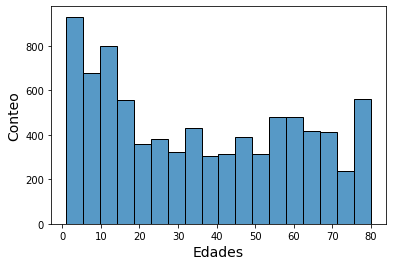

In [5]:
sns.histplot(x="AgeInYearsAtScreening", data=nhanes_data)
plt.xlabel("Edades", size=14)
plt.ylabel("Conteo", size=14)
plt.show()

Puedes ver en este gráfico que la función `sns.histplot()` ha agrupado a los individuos en intervalos de varios años. Eso es porque dejamos que determine automáticamente el tamaño de los intervalos.

Digamos que, en cambio, queremos clasificar cada año por separado. Podemos hacer esto usando el argumento `bins` para `sns.histplot`. 

Debido a que este argumento toma una lista de intervalos, necesitamos crear una lista que abarque desde la edad más joven hasta la mayor. Podemos hacer esto usando la función `np.arange()` de numpy, que genera una lista de números que abarcan un rango particular. 

En este caso, necesitamos abarcar desde el valor más joven hasta el más antiguo, que son equivalentes a los valores mínimo y máximo que podemos obtener usando los operadores `.min()` y `.max()`. Dado que Python comienza a contar desde cero, necesitamos agregar uno al máximo para que los contenedores cubran todo el rango:

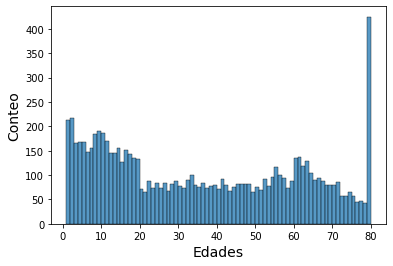

In [6]:
bins = np.arange(
    nhanes_data["AgeInYearsAtScreening"].min(),
    nhanes_data["AgeInYearsAtScreening"].max() + 1,
)

sns.histplot(x="AgeInYearsAtScreening", data=nhanes_data, bins=bins)
plt.xlabel("Edades", size=14)
plt.ylabel("Conteo", size=14)
plt.show()

A veces es más útil mirar la densidad en lugar de los recuentos, lo que podemos hacer estableciendo `stat="density"` en nuestra función:

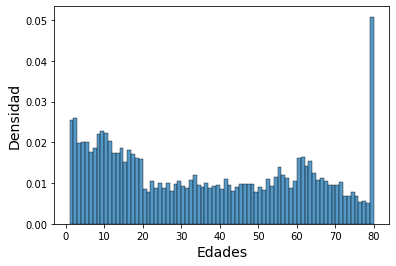

In [10]:
sns.histplot(
    x="AgeInYearsAtScreening", data=nhanes_data, bins=bins, stat="density"
)
plt.xlabel("Edades", size=14)
plt.ylabel("Densidad", size=14)
plt.show()

Ahora vemos la proporción de individuos que caen en cada categoría de edad. ¿Por qué crees que hay tantas personas de ochenta años en el conjunto de datos? Echa un vistazo a la [documentación](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm#RIDAGEYR) y averígualo.



## Gráficos de líneas

Los histogramas anteriores son un ejemplo de gráficos de barras donde cada número está representado por una barra. También podríamos trazar la distribución usando una línea en su lugar. Una razón para hacer esto es que podemos hacer que la línea sea un poco más suave que los datos reales. 

Por ejemplo, aquí están los datos del histograma de arriba, graficados como una línea:

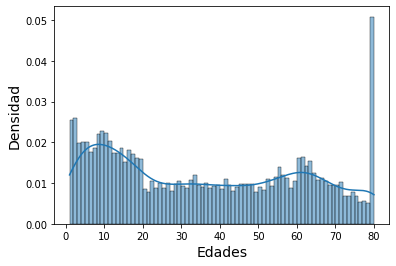

In [12]:
sns.histplot(
    x="AgeInYearsAtScreening",
    data=nhanes_data,
    bins=bins,
    stat="density",
    kde=True,
)
plt.xlabel("Edades", size=14)
plt.ylabel("Densidad", size=14)
plt.show()

Puedes ver que la línea, por lo general, sigue la forma general de los datos bastante de cerca, pero también puedes ver que en su mayoría oculta el gran aumento a los 80 años. Siempre es importante tener en cuenta que cualquier cosa que hagamos con los datos tiene el potencial de distorsionar su mensaje.

## Gráficos con dos variables

Otro uso común de la visualización es examinar la relación entre dos variables. Por ejemplo, digamos que queríamos graficar la altura promedio en función de la edad en el conjunto de datos de NHANES:

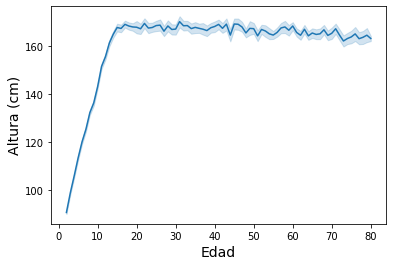

In [21]:
sns.lineplot(x="AgeInYearsAtScreening", y="StandingHeightCm", data=nhanes_data)
plt.xlabel("Edad", size=14)
plt.ylabel("Altura (cm)", size=14)
plt.show()

Como era de esperar, las personas crecen hasta los 18 años y luego se encogen lentamente con el tiempo.

Como sabemos que los hombres y las mujeres difieren en su altura, también podemos trazar sus alturas promedio por separado. Para ello, especificamos la variable que queremos usar para separar (usando diferentes colores):

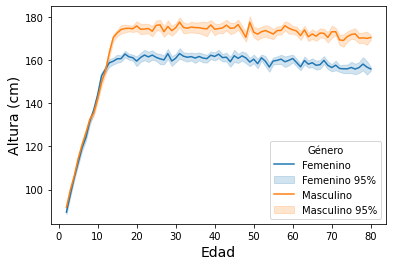

In [38]:
sns.lineplot(
    x="AgeInYearsAtScreening",
    y="StandingHeightCm",
    hue="Gender",
    data=nhanes_data,
)
plt.xlabel("Edad", size=14)
plt.ylabel("Altura (cm)", size=14)
plt.legend(
    ["Femenino", "Femenino 95%", "Masculino", "Masculino 95%"], title="Género"
)
plt.show()

Notarás que las líneas tienen áreas sombreadas a su alrededor; estos se denominan intervalos de confianza y los conocerás más adelante en el curso. Básicamente, nos dicen algo sobre la incertidumbre en torno a nuestras estimaciones del promedio.

## Graficando la dispersión

Un trabajo importante de la visualización estadística es mostrarnos la variabilidad o dispersión de nuestros datos. Ya hemos visto cómo hacer esto usando histogramas; ahora veamos cómo podemos comparar distribuciones.

Comencemos con un ejemplo simple: comparar la altura de hombres y mujeres adultos en la muestra de NHANES. 

Un diagrama de uso común es el diagrama de caja (a veces conocido como diagrama de caja y bigotes). Esta forma de gráfico usa cuartiles para darnos una sensación de extensión. La línea más gruesa, en algún lugar dentro del cuadro, representa la mediana. 

Los límites superior e inferior del cuadro (las bisagras) son el primer y tercer cuartil (¿puede usarlos para aproximar el rango intercuartílico?). Las líneas que se extienden desde las bisagras son los puntos de datos restantes, excluidos los valores atípicos, que se trazan como puntos individuales.

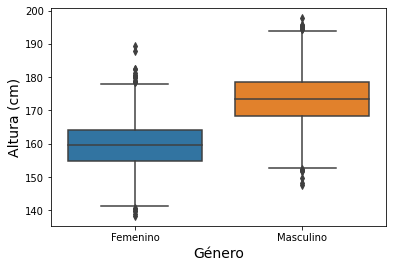

In [40]:
adult_nhanes_data = nhanes_data.query("AgeInYearsAtScreening > 17")
sns.boxplot(x="Gender", y="StandingHeightCm", data=adult_nhanes_data)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.xlabel("Género", size=14)
plt.ylabel("Altura (cm)", size=14)
plt.show()

Esto nos dice que el hombre medio es más alto que el 75% de todas las mujeres de la muestra.

Otro tipo de gráfico que se usa comúnmente es el gráfico de violín, que muestra la forma de toda la distribución:

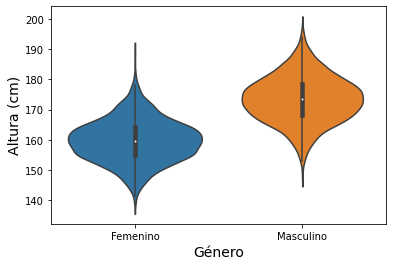

In [41]:
sns.violinplot(x="Gender", y="StandingHeightCm", data=adult_nhanes_data)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.xlabel("Género", size=14)
plt.ylabel("Altura (cm)", size=14)
plt.show()

## Gráfico de dispersión

Cuando tenemos múltiples variables continuas, podemos usar puntos para trazar cada variable en un eje. Esto se conoce como gráfico de dispersión. Como ejemplo, veamos las lecturas de presión arterial tomadas en el estudio NHANES. 

A cada individuo se le toma la presión arterial tres veces. Aquí trazaremos la primera lectura contra la segunda lectura, usando un gráfico de dispersión:

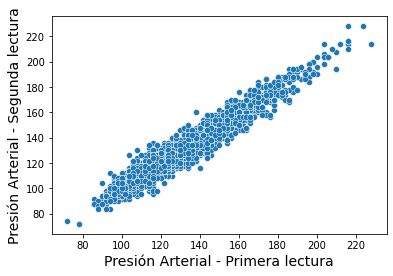

In [44]:
sns.scatterplot(
    x="SystolicBloodPres1StRdgMmHg",
    y="SystolicBloodPres2NdRdgMmHg",
    data=adult_nhanes_data,
)

plt.xlabel("Presión Arterial - Primera lectura", size=14)
plt.ylabel("Presión Arterial - Segunda lectura", size=14)
plt.show()

También podemos agregar una línea que muestre dónde el eje X es igual al eje Y, lo que facilita ver cómo se relacionan las dos variables entre sí:

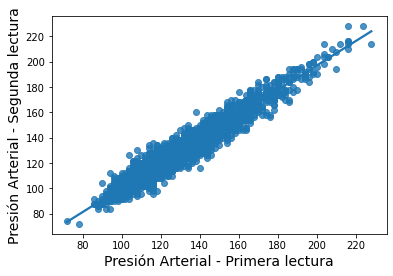

In [53]:
sns.regplot(
    x="SystolicBloodPres1StRdgMmHg",
    y="SystolicBloodPres2NdRdgMmHg",
    data=adult_nhanes_data,
)

plt.xlabel("Presión Arterial - Primera lectura", size=14)
plt.ylabel("Presión Arterial - Segunda lectura", size=14)
plt.show()

Aquí podemos ver que las dos variables están estrechamente relacionadas entre sí. También podemos ver que la mayoría de los puntos azules caen por debajo de la línea, lo que nos dice que la segunda lectura es generalmente algo más baja que la primera lectura.

# Modelos estadísticos

En el mundo físico, **los "modelos" son generalmente simplificaciones de cosas en el mundo real que, no obstante, transmiten la esencia de la cosa que se modela**. Un modelo de un edificio transmite la estructura del edificio al mismo tiempo que es lo suficientemente pequeño y liviano como para recogerlo con las manos; un modelo de una célula en biología es mucho más grande que el objeto real, pero de nuevo transmite las partes principales de la célula y sus relaciones.

En estadística, un modelo está destinado a proporcionar una descripción condensada similar, pero para datos más que para una estructura física. Como los modelos físicos, **un modelo estadístico es generalmente mucho más simple que los datos que se describen; está destinado a capturar la estructura de los datos de la manera más simple posible**. 

En ambos casos, nos damos cuenta de que el modelo es una ficción conveniente que necesariamente pasa por alto algunos de los detalles de la cosa real que se está modelando. Como dijo el estadístico George Box: **"Todos los modelos son incorrectos, pero algunos son útiles"**. 

También puede ser útil pensar en un modelo estadístico como una teoría de cómo se generaron los datos observados; **nuestro objetivo entonces es encontrar el modelo que resuma de manera más eficiente y precisa la forma en que se generaron realmente los datos**. Pero, como veremos durante el curso, los deseos de eficiencia y precisión a menudo serán diametralmente opuestos entre sí.

La estructura básica de un modelo estadístico es:

$$ datos = modelo + error $$

Esto expresa la idea de que los **datos se pueden dividir en dos porciones:** una porción que es descrita por un **modelo estadístico**, que expresa los valores que esperamos que tomen los datos dado nuestro conocimiento, y otra porción a la que nos referimos como el **error** que refleja la diferencia entre las predicciones del modelo y los datos observados.

En esencia, nos gustaría usar nuestro modelo para predecir el valor de los datos para cualquier observación dada. Escribiríamos la ecuación así:

$$ \widehat{datos}_{i} = modelo_{i} $$

El "sombrero" sobre los datos indica que es nuestra predicción en lugar del valor real de los datos. Esto significa que el valor predicho de los datos para la observación $i$ es igual al valor del modelo para esa observación. Una vez que tenemos una predicción del modelo, podemos calcular el error:

$$ error_{i} = datos_{i} - \widehat{datos}_{i}  $$

Es decir, el error de cualquier observación es la diferencia entre el valor observado de los datos y el valor predicho de los datos a partir del modelo.

## Un ejemplo de modelado estadístico

Veamos un ejemplo de cómo crear un modelo de datos, utilizando los datos de NHANES. En particular, intentaremos construir un modelo de la altura de los niños en la muestra NHANES. Primero carguemos los datos y generemos un gráfico:

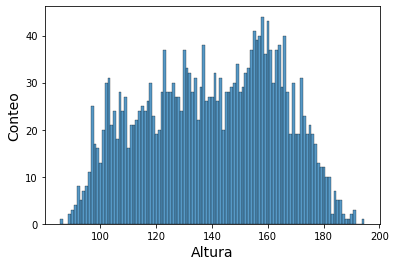

In [58]:
children_nhanes_data = nhanes_data.query("2 < AgeInYearsAtScreening < 18")
children_nhanes_data = children_nhanes_data.dropna(
    subset=["StandingHeightCm"]
).rename(columns={"StandingHeightCm": "Height"})

bins = np.arange(
    children_nhanes_data["Height"].min(),
    children_nhanes_data["Height"].max() + 1,
)

sns.histplot(x="Height", bins=bins, data=children_nhanes_data)
plt.xlabel("Altura", size=14)
plt.ylabel("Conteo", size=14)
plt.show()

Recuerda que queremos describir los datos de la manera más simple posible y al mismo tiempo capturar sus características importantes. **El modelo más simple que podamos imaginar involucraría solo un número; es decir, el modelo predeciría el mismo valor para cada observación, independientemente de lo que sepamos sobre esas observaciones**. 

Generalmente **describimos un modelo en términos de sus parámetros, que son valores que podemos cambiar para modificar las predicciones del modelo**. 

A lo largo de este material nos referiremos a ellos usando la letra griega beta ($\beta$); cuando el modelo tiene más de un parámetro, usaremos números subindicados para denotar las diferentes betas (por ejemplo, $\beta_{1}$). 

También se acostumbra referirse a los valores de los datos usando la letra $y$, y usar una versión subindicada $y_{i}$ para referirse a las observaciones individuales.

Por lo general, no conocemos los valores reales de los parámetros, por lo que debemos estimarlos a partir de los datos. 

Por esta razón, generalmente colocaremos un "sombrero" sobre el símbolo $\beta$ para indicar que estamos usando una estimación del valor del parámetro en lugar de su valor real (que generalmente no sabemos).  

Por lo tanto, nuestro modelo simple de altura usando un solo parámetro sería:

$$ y_{i} = \hat\beta + \epsilon $$

El subíndice $i$ no aparece en el lado derecho de la ecuación, lo que significa que la predicción del modelo no depende de la observación que estemos viendo; es la misma para todas.

La pregunta entonces es: ¿cómo estimamos los mejores valores de los parámetros en el modelo? 

En este caso particular, ¿qué valor único es la mejor estimación para $\beta$? 

Y, lo que es más importante, ¿cómo podemos definirlo mejor?

Un estimador muy simple que podríamos imaginar es la **moda**, que es simplemente el valor más común en el conjunto de datos. Esto redescribe el conjunto completo de 1691 niños en términos de un solo número. Si quisiéramos predecir la altura de cualquier niño nuevo, entonces nuestro valor predicho sería el mismo número:

$$ y_{i} = 136.7 $$

El error para cada individuo sería entonces la diferencia entre el valor predicho ($\hat{y}_{i}$) y su altura real ($y_{i}$):

$$ error_{i} = y_{i} - \hat{y}_{i} $$

¿Qué tan bueno es este modelo? En general, **definimos la bondad de un modelo en términos de la magnitud del error, que representa el grado en que los datos difieren de las predicciones del modelo**. 

En igualdad de condiciones, el modelo que produce un error menor es el mejor modelo. (Aunque, como veremos más adelante, generalmente no todas las condiciones son iguales). 

Lo que encontramos en este caso es que el individuo promedio tiene un error de -2.97 centímetros cuando usamos la moda como nuestro estimador para $\beta$, lo cual no parece muy bueno.

¿Cómo podemos encontrar un mejor estimador para nuestro parámetro de modelo? **Podríamos comenzar tratando de encontrar un estimador que nos dé un error promedio de cero**. Un buen candidato es la media aritmética (es decir, el promedio).

Resulta que si usamos la media aritmética como nuestro estimador, entonces el error promedio será cero. 

**Aunque el promedio de errores de la media es cero, podemos ver en el siguiente histograma que cada individuo todavía tiene algún grado de error**; algunos son positivos y otros negativos, y esos se cancelan entre sí para dar un error promedio de cero:

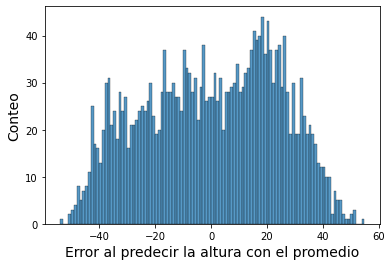

In [60]:
errors = children_nhanes_data["Height"] - np.mean(
    children_nhanes_data["Height"]
)

bins = np.arange(errors.min(), errors.max() + 1)

sns.histplot(errors, bins=bins)
plt.xlabel("Error al predecir la altura con el promedio", size=14)
plt.ylabel("Conteo", size=14)
plt.show()

El hecho de que **los errores negativos y positivos se anulen mutuamente** significa que dos modelos diferentes podrían tener errores de muy diferente magnitud en términos absolutos, pero aún tendrían el mismo error promedio. 

Ésta es exactamente la razón por la que **el error promedio no es un buen criterio para nuestro estimador**; queremos un criterio que intente minimizar el error general independientemente de su dirección. 

Por esta razón, generalmente **resumimos los errores con algún tipo de medida que contabiliza los errores positivos y negativos como malos**. Podríamos usar el valor absoluto de cada valor de error, pero **es más común usar los errores al cuadrado**, por razones que veremos más adelante.

Hay **varias formas comunes de resumir el error al cuadrado** que encontrarás durante el curso, por lo que es importante comprender cómo se relacionan entre sí. 

Primero, podríamos simplemente sumarlos; esto se conoce como la **suma de errores cuadrados (SSE)**. 

La razón por la que normalmente no usamos esto es que su magnitud **depende del número de datos**, por lo que puede ser difícil de interpretar a menos que estemos viendo el mismo número de observaciones. 

En segundo lugar, podríamos tomar la media de los valores de error cuadrático, que se conoce como **error cuadrático medio (MSE)**. Sin embargo, debido a que elevamos al cuadrado los valores antes de promediar, **no están en la misma escala que los datos originales**; están en centímetros al cuadrado. 

Por esta razón, también es común tomar la raíz cuadrada del MSE, al que nos referimos como la **raíz del error cuadrático medio (RMSE)**, de modo que **el error se mida en las mismas unidades que los valores originales** (en este ejemplo, centímetros).

La media tiene una cantidad considerable de error (cualquier punto de datos individual estará a unos 23.91 cm de la media en promedio), pero sigue siendo mejor que la moda, que tiene un error cuadrático medio de aproximadamente 24.09 cm.